In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import ensemble_project as ens

from sklearn.model_selection import train_test_split

from scipy.io import arff
import pandas as pd

In [3]:
data = arff.loadarff('C:/Users/Supervisor/Desktop/Kollektif Öğrenme/Proje/diabetes.arff')
df = pd.DataFrame(data[0])

df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,b'2'
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,b'1'
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,b'2'
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,b'1'
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,b'2'


In [4]:
X = df.drop(['class'],axis=1);
y = df['class']

In [5]:
y.groupby(y).count()

class
b'1'    500
b'2'    268
Name: class, dtype: int64

In [6]:
y = y.apply(lambda x : 0 if x==b'2' else 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
#41.4s sürdü
bagging_100vs10x10, eoe_bagging_100vs10x10, bagging_vs_ens, df_bagging_100vs10x10, df_diff_bagging_100vs10x10 = ens.baggingClassifier_100vs10x10(X_train, X_test, y_train, y_test)

In [9]:
#33.9s sürdü
ada_100vs10x10, eoe_ada_100vs10x10, ada_vs_ens, df_ada_100vs10x10, df_diff_ada_100vs10x10 = ens.adaBoostClassifier_100vs10x10(X_train, X_test, y_train, y_test)

In [10]:
#48.3s sürdü
#random subspace
rs_100vs10x10, eoe_rs_100vs10x10, rs_vs_ens, df_rs_100vs10x10, df_diff_rs_100vs10x10 = ens.randomSubspaceClassifier_100vs10x10(X_train, X_test, y_train, y_test)

In [11]:
#2m 40.7s sürdü
#random subspace
rf_100vs10x10, eoe_rf_100vs10x10, rf_vs_ens, df_rf_100vs10x10, df_diff_rf_100vs10x10 = ens.randomForestClassifier_100vs10x10(X_train, X_test, y_train, y_test)

In [12]:
#30.2s sürdü
#random subspace
extra_100vs10x10, eoe_extra_100vs10x10, extra_vs_ens, df_extra_100vs10x10, df_diff_extra_100vs10x10 = ens.extraTreesClassifier_100vs10x10(X_train, X_test, y_train, y_test)

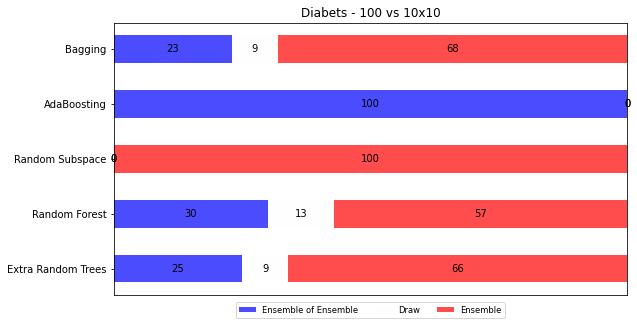

In [13]:
category_names = ['Ensemble of Ensemble', 'Draw','Ensemble']
results = {
    'Bagging': bagging_vs_ens,
    'AdaBoosting': ada_vs_ens,
    'Random Subspace' :rs_vs_ens,
    'Random Forest': rf_vs_ens,
    'Extra Random Trees' : extra_vs_ens   
}
data_name = 'Diabets - 100 vs 10x10'

fig, ax = ens.plot_ensemble_vs_eoe(results, category_names,data_name)

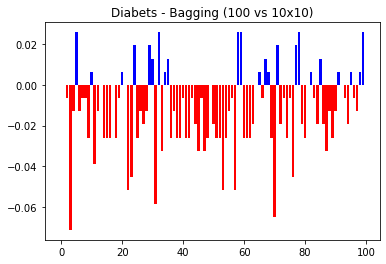

In [14]:
ens.plot_diff(df_diff_bagging_100vs10x10,'Diabets - Bagging (100 vs 10x10)')

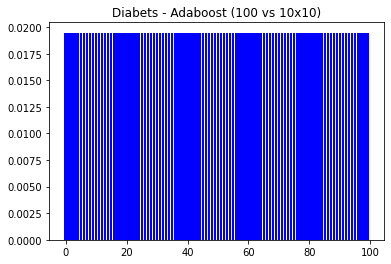

In [15]:
ens.plot_diff(df_diff_ada_100vs10x10,'Diabets - Adaboost (100 vs 10x10)')

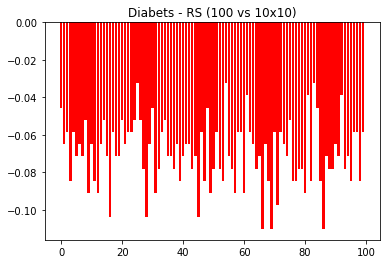

In [16]:
ens.plot_diff(df_diff_rs_100vs10x10,'Diabets - RS (100 vs 10x10)')

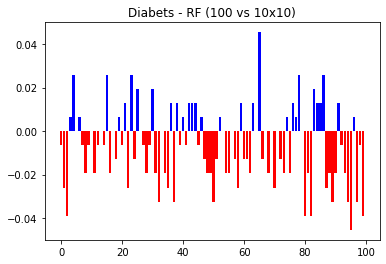

In [17]:
ens.plot_diff(df_diff_rf_100vs10x10,'Diabets - RF (100 vs 10x10)')

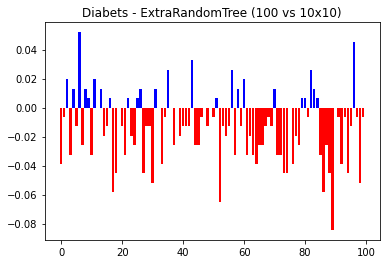

In [18]:
ens.plot_diff(df_diff_extra_100vs10x10,'Diabets - ExtraRandomTree (100 vs 10x10)')

In [19]:
#3m 29.9s sürdü
bagging_100vs10x100, eoe_bagging_100vs10x100, bagging_vs_ens_100, df_bagging_100vs10x100, df_diff_bagging_100vs10x100 = ens.baggingClassifier_100vs10x100(X_train, X_test, y_train, y_test)

In [20]:
#2m 39.5s sürdü
ada_100vs10x100, eoe_ada_100vs10x100, ada_vs_ens_100, df_ada_100vs10x100, df_diff_ada_100vs10x100 = ens.adaBoostClassifier_100vs10x100(X_train, X_test, y_train, y_test)

In [21]:
#46m 5s sürdü
#random subspace
rs_100vs10x100, eoe_rs_100vs10x100, rs_vs_ens_100, df_rs_100vs10x100, df_diff_rs_100vs10x100 = ens.randomSubspaceClassifier_100vs10x100(X_train, X_test, y_train, y_test)

In [22]:
#2m 52.7s sürdü
#random subspace
rf_100vs10x100, eoe_rf_100vs10x100, rf_vs_ens_100, df_rf_100vs10x100, df_diff_rf_100vs10x100 = ens.randomForestClassifier_100vs10x100(X_train, X_test, y_train, y_test)

In [23]:
#2m 52.7s sürdü
#random subspace
extra_100vs10x100, eoe_extra_100vs10x100, extra_vs_ens_100, df_extra_100vs10x100, df_diff_extra_100vs10x100 = ens.extraTreesClassifier_100vs10x100(X_train, X_test, y_train, y_test)

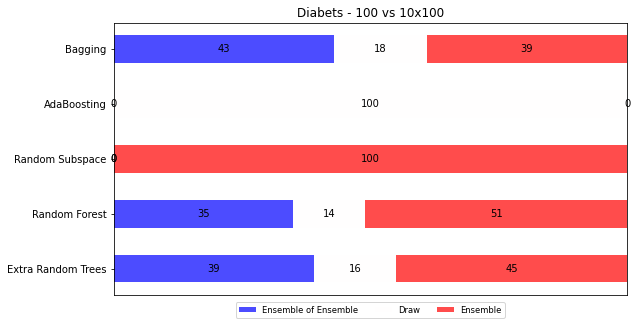

In [24]:
category_names = ['Ensemble of Ensemble', 'Draw','Ensemble']
results = {
    'Bagging': bagging_vs_ens_100,
    'AdaBoosting': ada_vs_ens_100,
    'Random Subspace' :rs_vs_ens_100,
    'Random Forest': rf_vs_ens_100,
    'Extra Random Trees' : extra_vs_ens_100   
}
data_name = 'Diabets - 100 vs 10x100'

fig, ax = ens.plot_ensemble_vs_eoe(results, category_names,data_name)

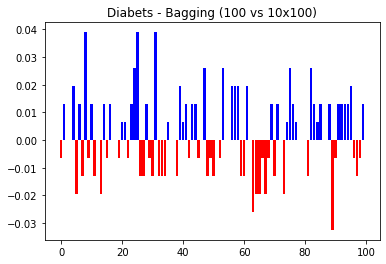

In [25]:
ens.plot_diff(df_diff_bagging_100vs10x100,'Diabets - Bagging (100 vs 10x100)')

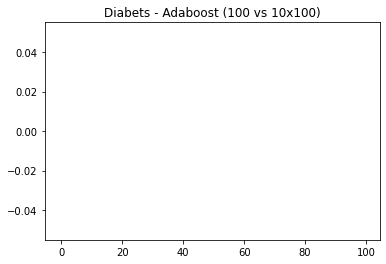

In [26]:
ens.plot_diff(df_diff_ada_100vs10x100,'Diabets - Adaboost (100 vs 10x100)')

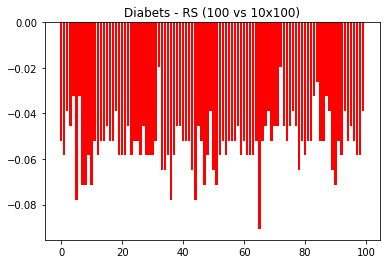

In [27]:
ens.plot_diff(df_diff_rs_100vs10x100,'Diabets - RS (100 vs 10x100)')

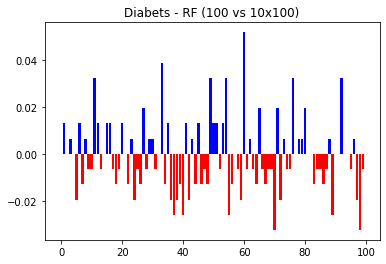

In [28]:
ens.plot_diff(df_diff_rf_100vs10x100,'Diabets - RF (100 vs 10x100)')

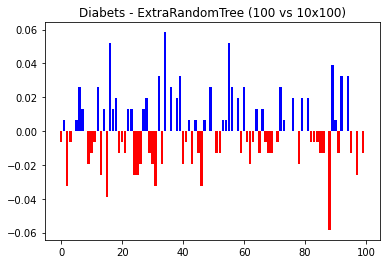

In [29]:
ens.plot_diff(df_diff_extra_100vs10x100,'Diabets - ExtraRandomTree (100 vs 10x100)')

In [30]:
all_df = ens.single_vote_stack(X_train, X_test, y_train, y_test)

In [31]:
all_df

,0,1
0,Bagging,0.734416
1,Adaboost,0.759740
2,RS,0.655844
3,RF,0.736364
4,ExtraRandomTree,0.707143
5,Voting,0.734416
6,Stack_Bagging,0.706494
7,Stack_Adaboost,0.737013
8,Stack_RS,0.724026
9,Stack_RF,0.737662


In [32]:
import matplotlib.pyplot as plt

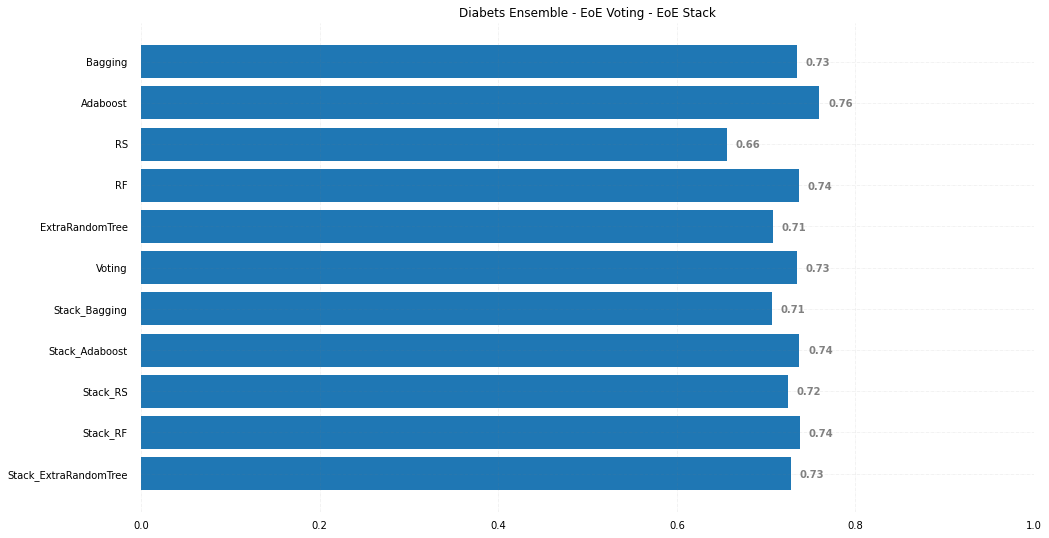

In [33]:
name = all_df[0]
acc = all_df[1]
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

ax.set_xlim(0,1)

# Horizontal Bar Plot
ax.barh(name, acc)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Diabets Ensemble - EoE Voting - EoE Stack', loc ='center')
 

 
# Show Plot
plt.show()